In [1]:
import numpy as np 
import pandas as pd 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv (r'Cross-Border 2019.csv')

In [3]:
df.head()

,Time (CET),BZN|FR > BZN|DE-LU [MW],BZN|DE-LU > BZN|FR [MW]
0,01.01.2019 00:00 - 01.01.2019 01:00,0.0,1044.0
1,01.01.2019 01:00 - 01.01.2019 02:00,0.0,625.0
2,01.01.2019 02:00 - 01.01.2019 03:00,0.0,388.0
3,01.01.2019 03:00 - 01.01.2019 04:00,0.0,176.0
4,01.01.2019 04:00 - 01.01.2019 05:00,0.0,706.0


In [4]:
df.tail()

,Time (CET),BZN|FR > BZN|DE-LU [MW],BZN|DE-LU > BZN|FR [MW]
8756,31.12.2019 19:00 - 31.12.2019 20:00,0.0,202.0
8757,31.12.2019 20:00 - 31.12.2019 21:00,0.0,154.0
8758,31.12.2019 21:00 - 31.12.2019 22:00,394.0,0.0
8759,31.12.2019 22:00 - 31.12.2019 23:00,573.0,0.0
8760,31.12.2019 23:00 - 01.01.2020 00:00,586.0,0.0


In [5]:
df.describe()

,BZN|FR > BZN|DE-LU [MW],BZN|DE-LU > BZN|FR [MW]
count,8760.000000,8760.000000
mean,1692.533676,196.190753
std,1417.924723,470.218046
min,0.000000,0.000000
25%,135.750000,0.000000
50%,1608.000000,0.000000
75%,2984.250000,0.000000
max,5223.000000,3000.000000


In [6]:
new_df= df["Time (CET)"].str.split("-",n=1,expand= True)
df["Date part "]=new_df[0]
df["CET_Timestamp"]=new_df[1]


In [7]:
df['CET_Timestamp'] = df['CET_Timestamp'].astype('datetime64[ns]')

In [8]:
df = df.assign(Date= df.CET_Timestamp.dt.date, Time = df.CET_Timestamp.dt.time )
df = df.set_index (['CET_Timestamp'])

In [9]:

df.head(3)

,Time (CET),BZN|FR > BZN|DE-LU [MW],BZN|DE-LU > BZN|FR [MW],Date part,Date,Time
CET_Timestamp,,,,,,
2019-01-01 01:00:00,01.01.2019 00:00 - 01.01.2019 01:00,0.0,1044.0,01.01.2019 00:00,2019-01-01,01:00:00
2019-01-01 02:00:00,01.01.2019 01:00 - 01.01.2019 02:00,0.0,625.0,01.01.2019 01:00,2019-01-01,02:00:00
2019-01-01 03:00:00,01.01.2019 02:00 - 01.01.2019 03:00,0.0,388.0,01.01.2019 02:00,2019-01-01,03:00:00


In [9]:
df.index

DatetimeIndex(['2019-01-01 01:00:00', '2019-01-01 02:00:00',
               '2019-01-01 03:00:00', '2019-01-01 04:00:00',
               '2019-01-01 05:00:00', '2019-01-01 06:00:00',
               '2019-01-01 07:00:00', '2019-01-01 08:00:00',
               '2019-01-01 09:00:00', '2019-01-01 10:00:00',
               ...
               '2019-12-31 15:00:00', '2019-12-31 16:00:00',
               '2019-12-31 17:00:00', '2019-12-31 18:00:00',
               '2019-12-31 19:00:00', '2019-12-31 20:00:00',
               '2019-12-31 21:00:00', '2019-12-31 22:00:00',
               '2019-12-31 23:00:00', '2020-01-01 00:00:00'],
              dtype='datetime64[ns]', name='CET_Timestamp', length=8761, freq=None)

In [10]:
# Add columns with year, month, and weekday name
df['Year'] = df.index.year
df['Month'] = df.index.month
df['day'] = df.index.day
# Display a random sampling of 5 rows
# df.sample(5, random_state=0)

In [11]:
df.tail(3)

,Time (CET),BZN|FR > BZN|DE-LU [MW],BZN|DE-LU > BZN|FR [MW],Date part,Date,Time,Year,Month,day
CET_Timestamp,,,,,,,,,
2019-12-31 22:00:00,31.12.2019 21:00 - 31.12.2019 22:00,394.0,0.0,31.12.2019 21:00,2019-12-31,22:00:00,2019,12,31
2019-12-31 23:00:00,31.12.2019 22:00 - 31.12.2019 23:00,573.0,0.0,31.12.2019 22:00,2019-12-31,23:00:00,2019,12,31
2020-01-01 00:00:00,31.12.2019 23:00 - 01.01.2020 00:00,586.0,0.0,31.12.2019 23:00,2020-01-01,00:00:00,2020,1,1


In [12]:
df.loc['2019-10-25']

,Time (CET),BZN|FR > BZN|DE-LU [MW],BZN|DE-LU > BZN|FR [MW],Date part,Date,Time,Year,Month,day
CET_Timestamp,,,,,,,,,
2019-10-25 00:00:00,24.10.2019 23:00 - 25.10.2019 00:00,0.0,23.0,24.10.2019 23:00,2019-10-25,00:00:00,2019,10,25
2019-10-25 01:00:00,25.10.2019 00:00 - 25.10.2019 01:00,188.0,0.0,25.10.2019 00:00,2019-10-25,01:00:00,2019,10,25
2019-10-25 02:00:00,25.10.2019 01:00 - 25.10.2019 02:00,817.0,0.0,25.10.2019 01:00,2019-10-25,02:00:00,2019,10,25
2019-10-25 03:00:00,25.10.2019 02:00 - 25.10.2019 03:00,1002.0,0.0,25.10.2019 02:00,2019-10-25,03:00:00,2019,10,25
2019-10-25 04:00:00,25.10.2019 03:00 - 25.10.2019 04:00,1521.0,0.0,25.10.2019 03:00,2019-10-25,04:00:00,2019,10,25
2019-10-25 05:00:00,25.10.2019 04:00 - 25.10.2019 05:00,1689.0,0.0,25.10.2019 04:00,2019-10-25,05:00:00,2019,10,25
2019-10-25 06:00:00,25.10.2019 05:00 - 25.10.2019 06:00,1759.0,0.0,25.10.2019 05:00,2019-10-25,06:00:00,2019,10,25
2019-10-25 07:00:00,25.10.2019 06:00 - 25.10.2019 07:00,1156.0,0.0,25.10.2019 06:00,2019-10-25,07:00:00,2019,10,25
2019-10-25 08:00:00,25.10.2019 07:00 - 25.10.2019 08:00,0.0,74.0,25.10.2019 07:00,2019-10-25,08:00:00,2019,10,25


In [13]:
import matplotlib.pyplot as plt

In [14]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

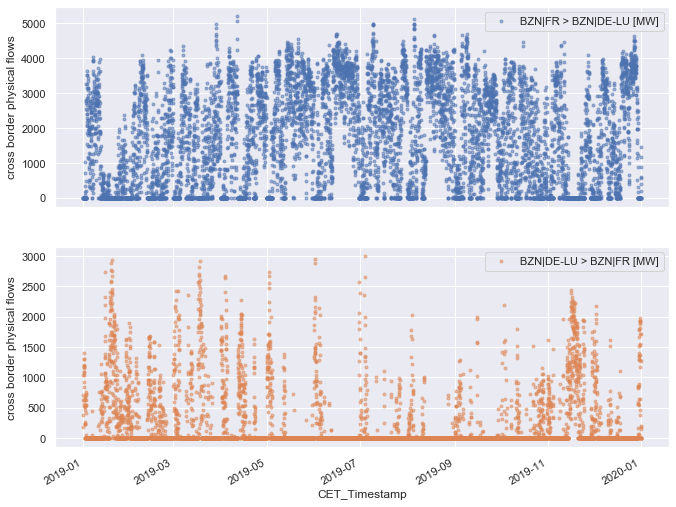

In [15]:
cols_plot = ['BZN|FR > BZN|DE-LU [MW]','BZN|DE-LU > BZN|FR [MW]' ]
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('cross border physical flows')

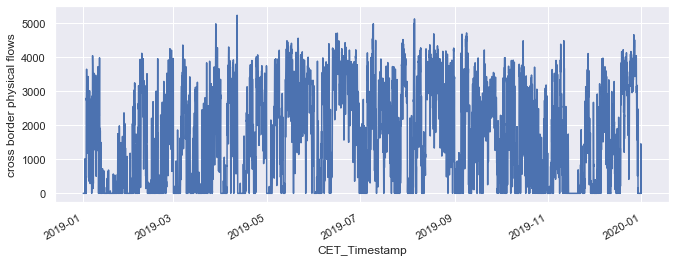

In [16]:
ax = df.loc['2019', 'BZN|FR > BZN|DE-LU [MW]'].plot(grid = True)
ax.set_ylabel('cross border physical flows');

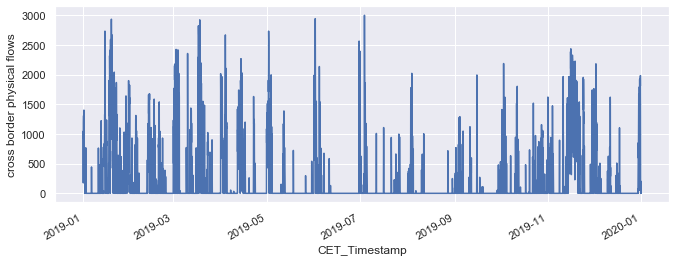

In [17]:
ax = df.loc['2019', 'BZN|DE-LU > BZN|FR [MW]'].plot(grid = True)
ax.set_ylabel('cross border physical flows');

In [18]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['BZN|FR > BZN|DE-LU [MW]', 'BZN|DE-LU > BZN|FR [MW]']
# Resample to weekly frequency, aggregating with mean
df_mean = df[data_columns].resample('W').mean()
df_mean.head(3)

,BZN|FR > BZN|DE-LU [MW],BZN|DE-LU > BZN|FR [MW]
CET_Timestamp,,
2019-01-06,1363.048951,202.083916
2019-01-13,1833.690476,73.625000
2019-01-20,70.464286,948.285714


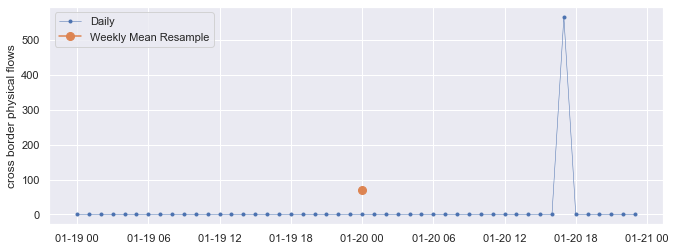

In [19]:
# Start and end of the date range to extract
start, end = '2019-01-19', '2019-01-20'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(df.loc[start:end, 'BZN|FR > BZN|DE-LU [MW]'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(df_mean.loc[start:end, 'BZN|FR > BZN|DE-LU [MW]'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('cross border physical flows')
ax.legend();

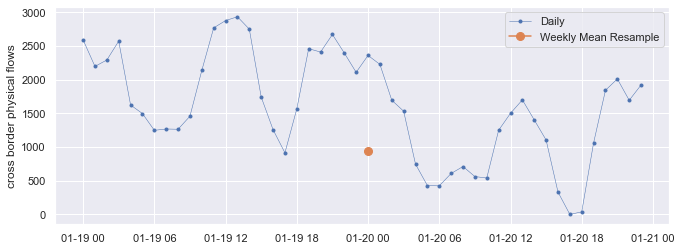

In [20]:
# Start and end of the date range to extract
start, end = '2019-01-19', '2019-01-20'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(df.loc[start:end, 'BZN|DE-LU > BZN|FR [MW]'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(df_mean.loc[start:end, 'BZN|DE-LU > BZN|FR [MW]'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('cross border physical flows')
ax.legend();

In [21]:
df = np.random.rand(4, 6)

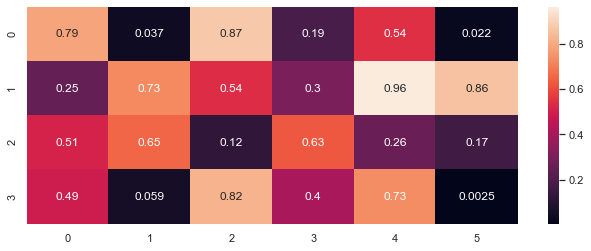

In [22]:
df = np.random.rand(4, 6)
heat_map = sns.heatmap(df, annot=True)
  

Text(0.5, 1.0, 'Yearly Maximum cross border flows frequency for year end in BZN|FR > BZN|DE-LU [MW] ')

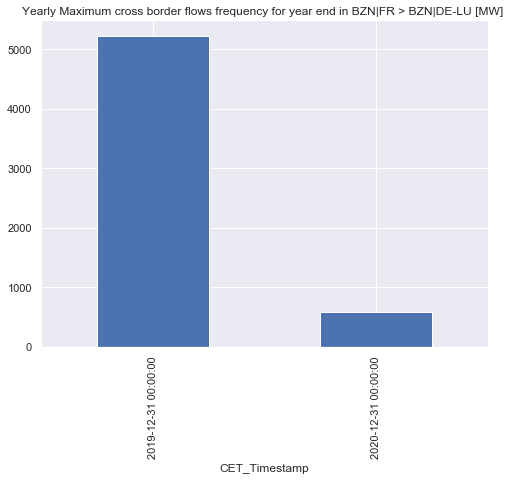

In [16]:
plt.rcParams['figure.figsize'] = (8, 6) # change plot size
df['BZN|FR > BZN|DE-LU [MW]'].resample('A').max().plot(kind='bar')
plt.title('Yearly Maximum cross border flows frequency for year end in BZN|FR > BZN|DE-LU [MW] ')

Text(0.5, 1.0, ' Maximum cross border flows for week  in BZN|FR > BZN|DE-LU [MW] ')

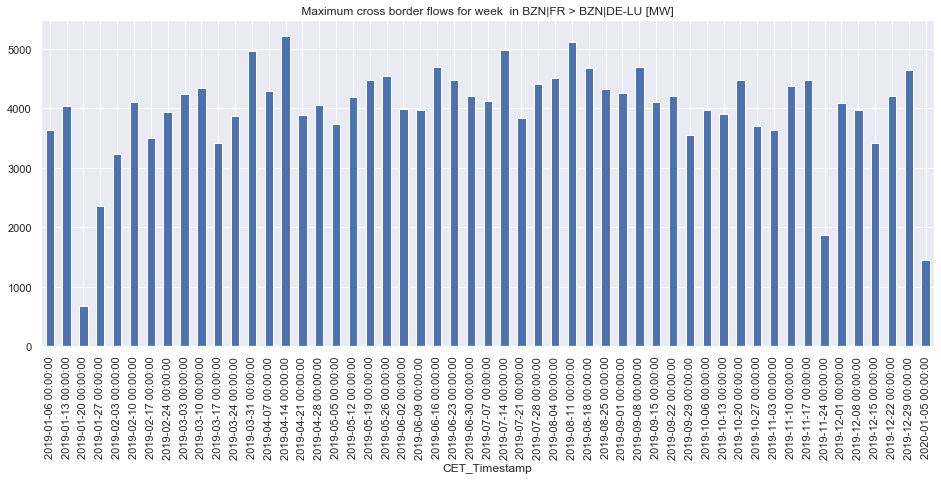

In [40]:
plt.rcParams['figure.figsize'] = (16, 6) # change plot size
df['BZN|FR > BZN|DE-LU [MW]'].resample('W').max().plot(kind='bar')
plt.title(' Maximum cross border flows for week  in BZN|FR > BZN|DE-LU [MW] ')

Text(0.5, 1.0, 'Yearly Maximum cross border flows for month end in BZN|FR > BZN|DE-LU [MW] ')

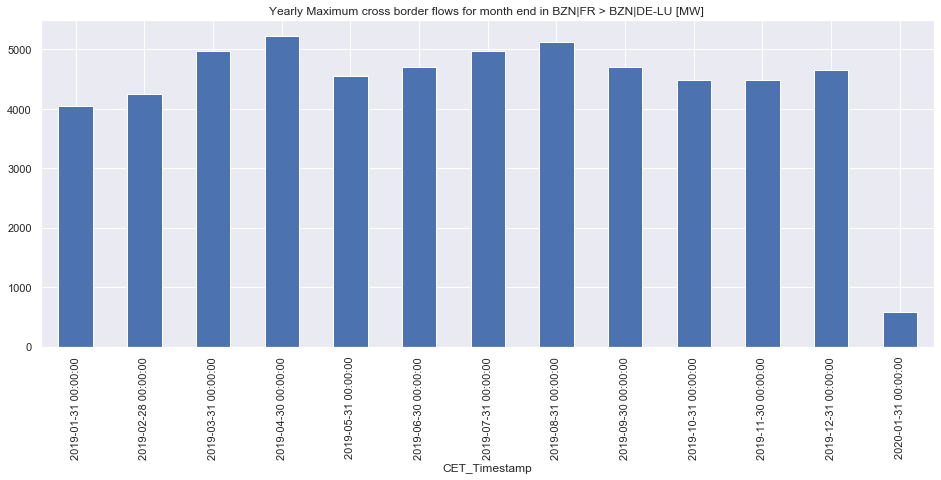

In [20]:
plt.rcParams['figure.figsize'] = (16, 6) # change plot size
df['BZN|FR > BZN|DE-LU [MW]'].resample('M').max().plot(kind='bar')
plt.title('Yearly Maximum cross border flows for month end in BZN|FR > BZN|DE-LU [MW] ')

Text(0.5, 1.0, 'Yearly Maximum cross border flows for quarter end  in BZN|FR > BZN|DE-LU [MW] ')

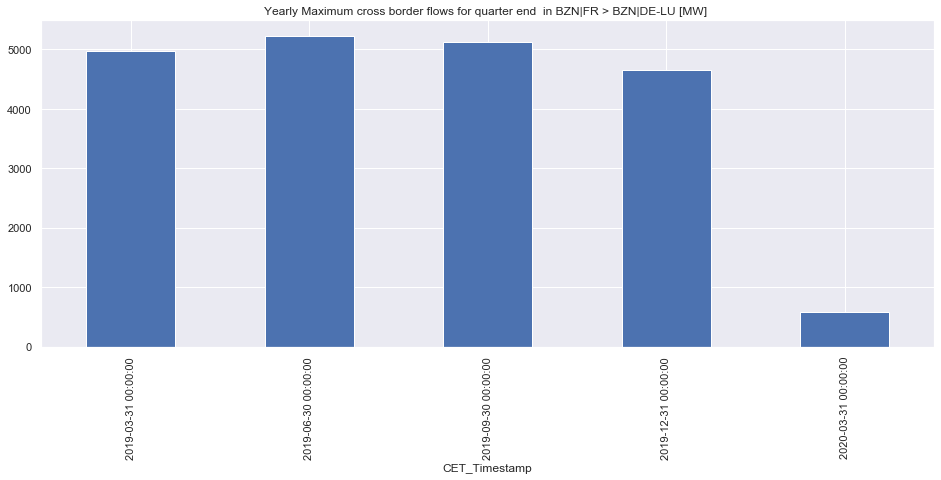

In [21]:
plt.rcParams['figure.figsize'] = (16, 6) # change plot size
df['BZN|FR > BZN|DE-LU [MW]'].resample('Q').max().plot(kind='bar')
plt.title('Yearly Maximum cross border flows for quarter end  in BZN|FR > BZN|DE-LU [MW] ')

Text(0.5, 1.0, 'Yearly Maximum cross border flows frequency for year end in BZN|DE-LU > BZN|FR [MW]')

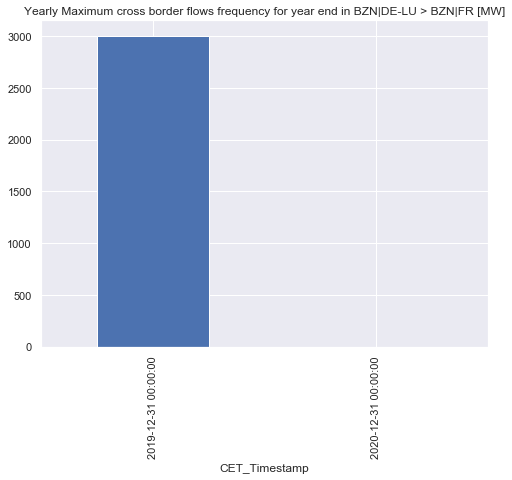

In [17]:
plt.rcParams['figure.figsize'] = (8, 6) # change plot size
df['BZN|DE-LU > BZN|FR [MW]'].resample('A').max().plot(kind='bar')
plt.title('Yearly Maximum cross border flows frequency for year end in BZN|DE-LU > BZN|FR [MW]')

Text(0.5, 1.0, 'Yearly Maximum cross border flows for week end in BZN|DE-LU > BZN|FR [MW] ')

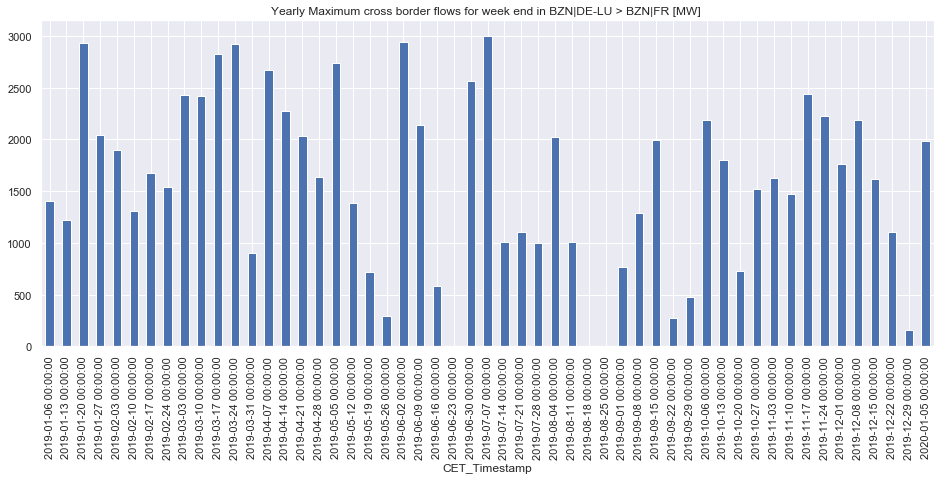

In [18]:
plt.rcParams['figure.figsize'] = (16, 6) # change plot size
df['BZN|DE-LU > BZN|FR [MW]'].resample('W').max().plot(kind='bar')
plt.title('Yearly Maximum cross border flows for week end in BZN|DE-LU > BZN|FR [MW] ')

Text(0.5, 1.0, 'Yearly Maximum cross border flows for month end in BZN|DE-LU > BZN|FR [MW] ')

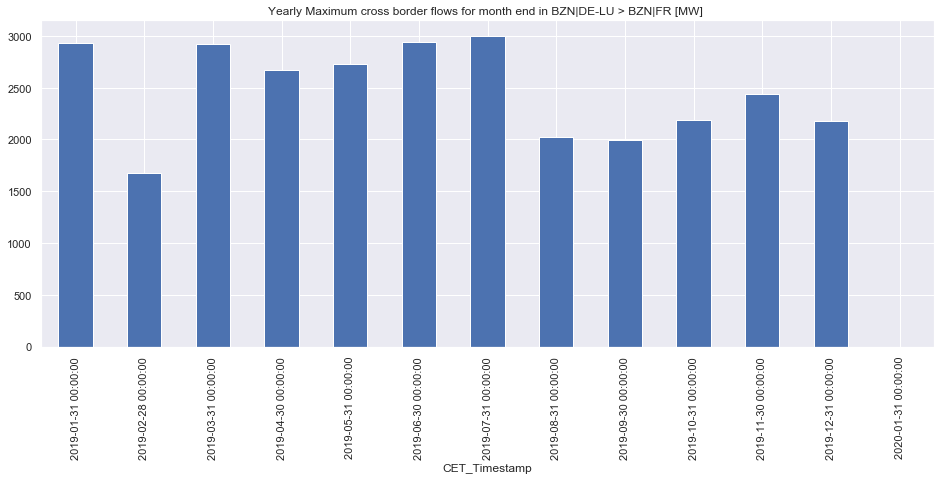

In [19]:
plt.rcParams['figure.figsize'] = (16, 6) # change plot size
df['BZN|DE-LU > BZN|FR [MW]'].resample('M').max().plot(kind='bar')
plt.title('Yearly Maximum cross border flows for month end in BZN|DE-LU > BZN|FR [MW] ')

Text(0.5, 1.0, 'Yearly Maximum cross border flows for quarter end  in BZN|DE-LU > BZN|FR [MW] ')

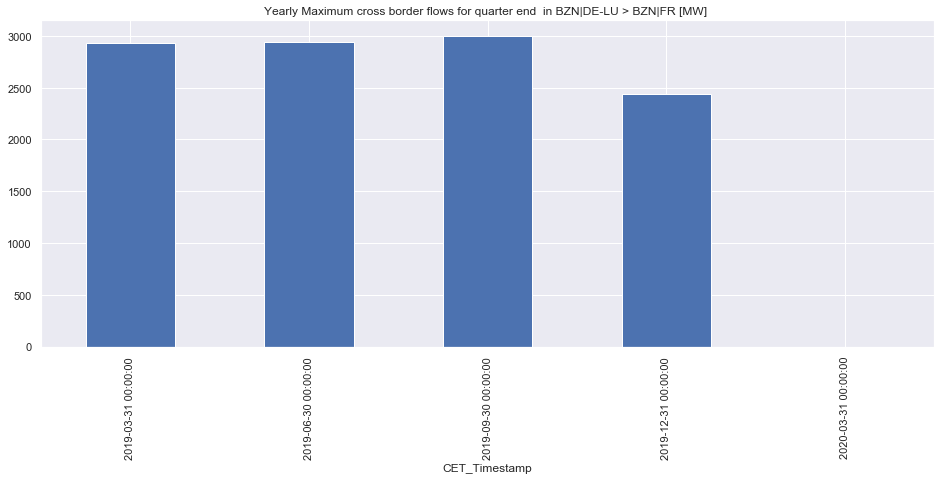

In [22]:
plt.rcParams['figure.figsize'] = (16, 6) # change plot size
df['BZN|DE-LU > BZN|FR [MW]'].resample('Q').max().plot(kind='bar')
plt.title('Yearly Maximum cross border flows for quarter end  in BZN|DE-LU > BZN|FR [MW] ')

Text(0.5, 1.0, 'Daily cross border flows analysis')

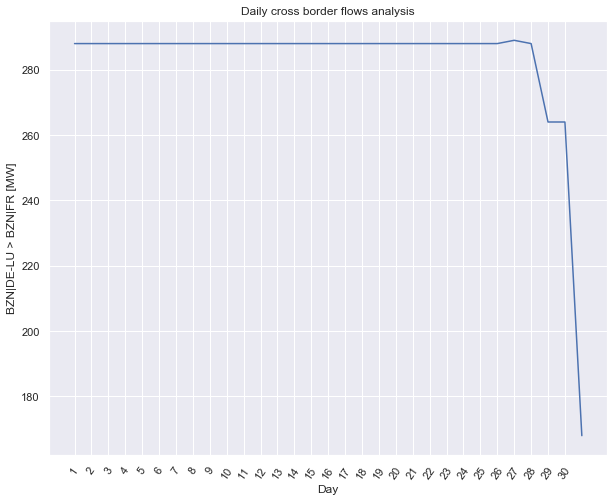

In [160]:
sales_by_day = df.groupby('day').size()
plot_by_day = sales_by_day.plot(title='Daily cross border flows',xticks=(range(1,31)),rot=55)
plot_by_day.set_xlabel('Day')
plot_by_day.set_ylabel('BZN|DE-LU > BZN|FR [MW]')
plt.title("Daily cross border flows analysis")

Text(0.5, 1.0, 'Monthly cross border flows analysis')

C:\Users\natha\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\natha\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


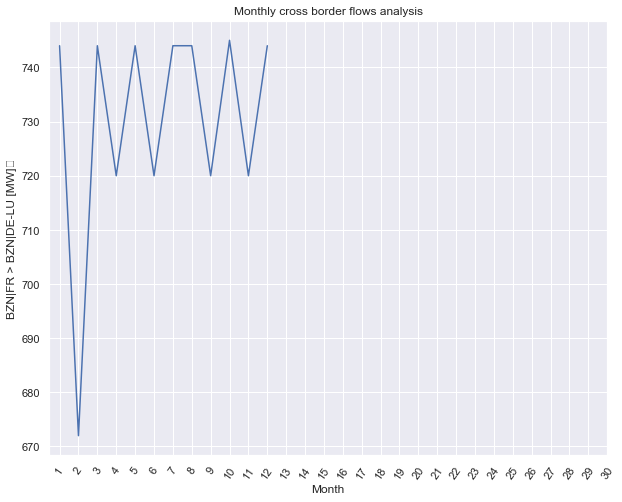

In [170]:
sales_by_day = df.groupby('Month').size()
plot_by_day = sales_by_day.plot(title='Daily cross border flows',xticks=(range(1,31)),rot=55)
plot_by_day.set_xlabel('Month')
plot_by_day.set_ylabel('BZN|FR > BZN|DE-LU [MW]	')
plt.title("Monthly cross border flows analysis")

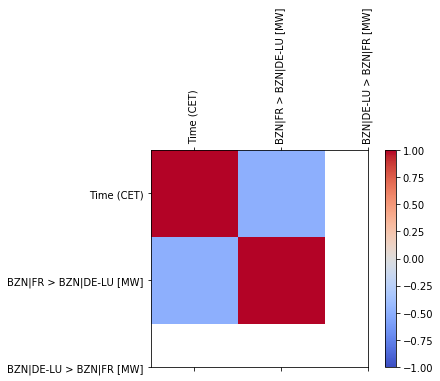

In [5]:
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()


In [37]:
pt_titanic = df.pivot_table(index='Time', columns='Date', values='BZN|FR > BZN|DE-LU [MW]')

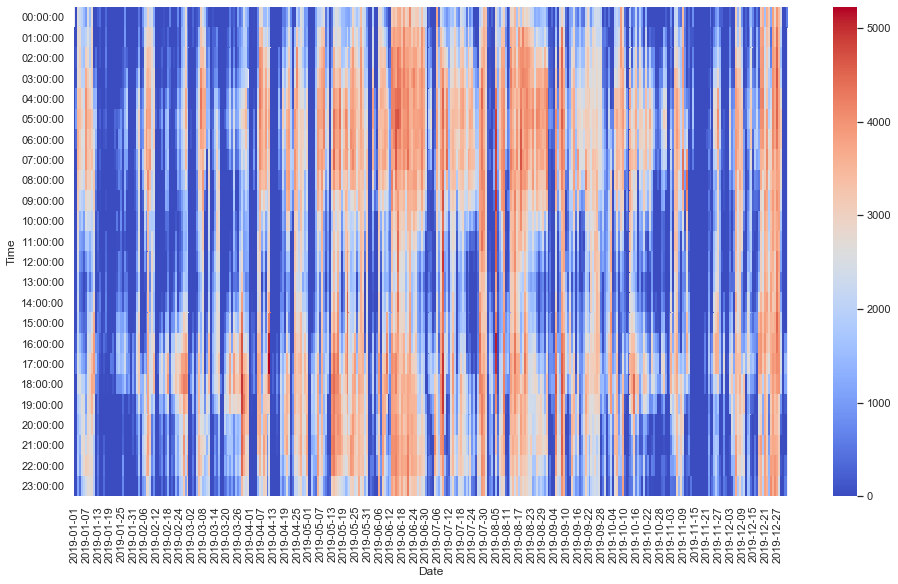

In [38]:

plt.figure(figsize=(16,9))
sns.heatmap(pt_titanic,cmap="coolwarm")

In [51]:
pt_titanic2 = df.pivot_table(index='Time', columns='Date', values='BZN|DE-LU > BZN|FR [MW]')

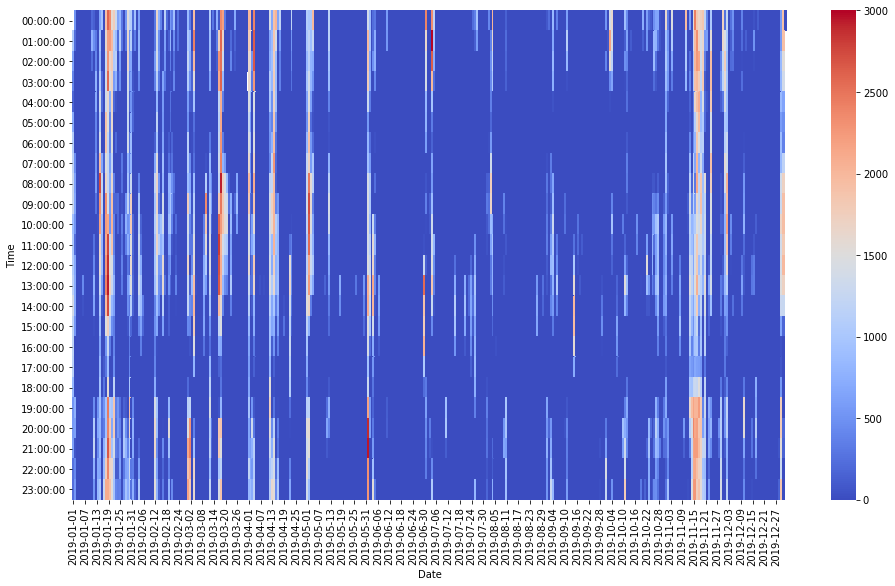

In [53]:
plt.figure(figsize=(16,9))
sns.heatmap(pt_titanic2,cmap="coolwarm")

In [63]:
pt_titanic2 = df.pivot_table(index='Time', columns='Month', values='BZN|DE-LU > BZN|FR [MW]')

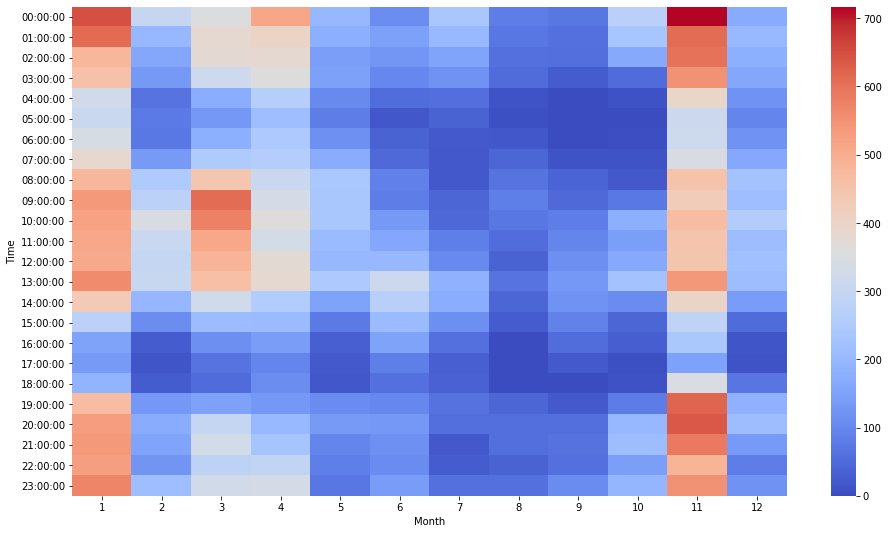

In [64]:
plt.figure(figsize=(16,9))
sns.heatmap(pt_titanic2,cmap="coolwarm")

In [68]:
pt_titanic3 = df.pivot_table(index='Time', columns='Month', values='BZN|FR > BZN|DE-LU [MW]')

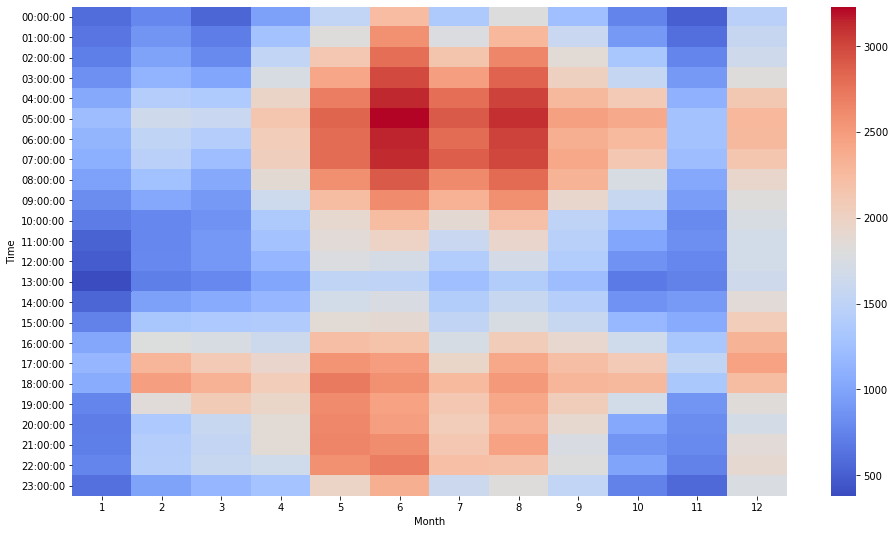

In [69]:
plt.figure(figsize=(16,9))
sns.heatmap(pt_titanic3,cmap="coolwarm")

In [88]:
pt_titanic4 = df.pivot_table(index='Time', columns='day', values='BZN|FR > BZN|DE-LU [MW]')

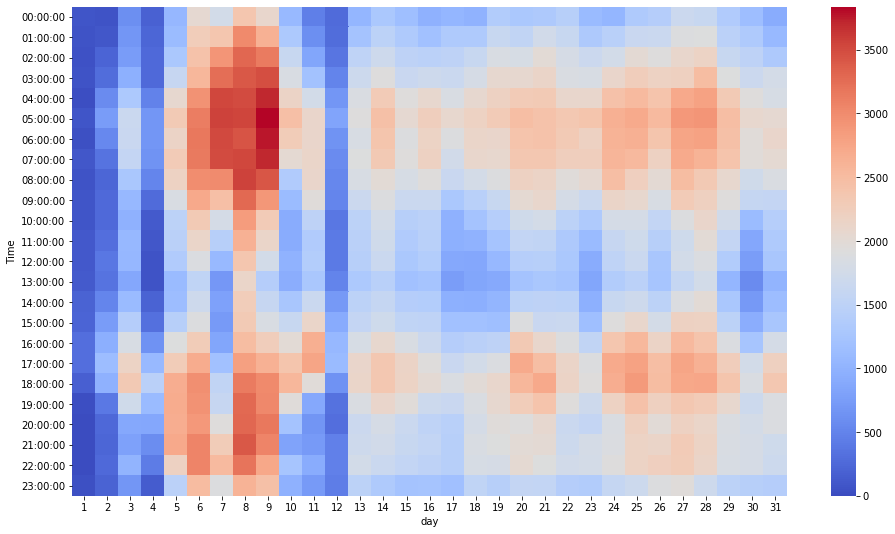

In [89]:
plt.figure(figsize=(16,9))
sns.heatmap(pt_titanic4,cmap="coolwarm")

In [90]:
pt_titanic5 = df.pivot_table(index='Time', columns='day', values='BZN|DE-LU > BZN|FR [MW]')

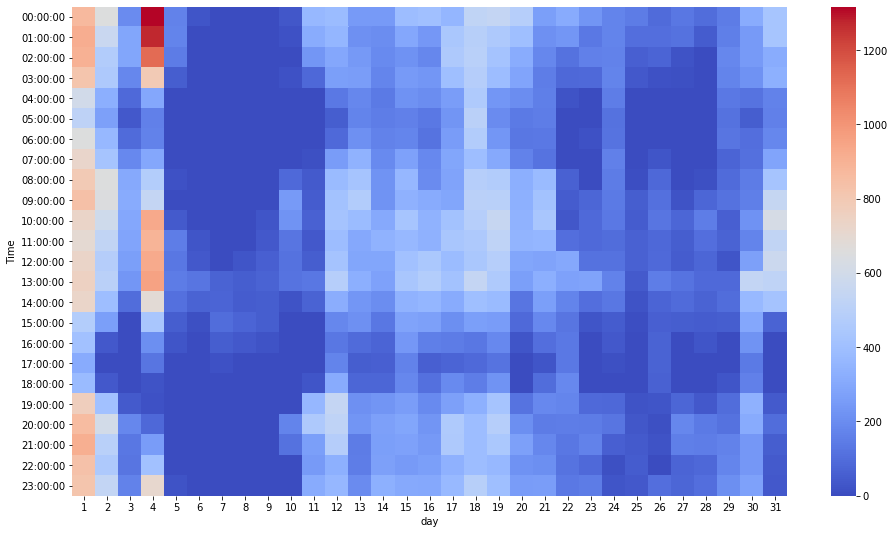

In [91]:
plt.figure(figsize=(16,9))
sns.heatmap(pt_titanic5,cmap="coolwarm")

In [98]:
pt_titanic6 = df.pivot_table(index='Month', columns='day', values='BZN|DE-LU > BZN|FR [MW]')

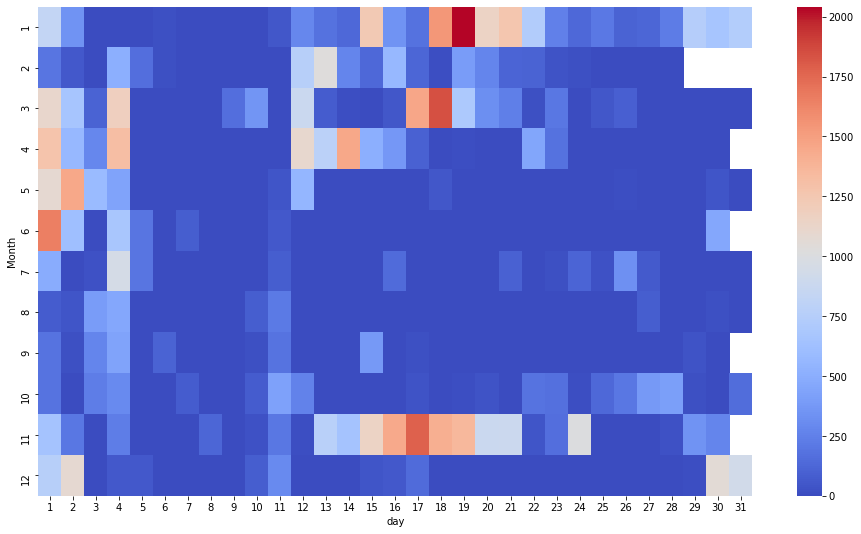

In [99]:
plt.figure(figsize=(16,9))
sns.heatmap(pt_titanic6,cmap="coolwarm")

In [100]:
pt_titanic7 = df.pivot_table(index='Month', columns='day', values='BZN|FR > BZN|DE-LU [MW]')

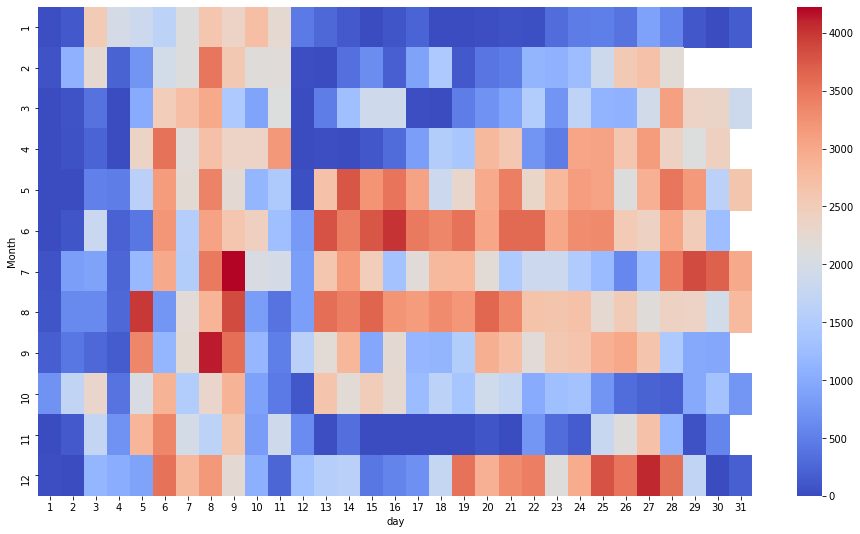

In [101]:
plt.figure(figsize=(16,9))
sns.heatmap(pt_titanic7,cmap="coolwarm")

In [10]:
df['BZN|DE-LU > BZN|FR [MW]-BZN|FR > BZN|DE-LU [MW]'] = df['BZN|DE-LU > BZN|FR [MW]']-df['BZN|FR > BZN|DE-LU [MW]']

In [11]:
# Add columns with year, month, and weekday name
df['Year'] = df.index.year
df['Month'] = df.index.month
df['day'] = df.index.day
# Display a random sampling of 5 rows
# df.sample(5, random_state=0)

In [12]:
pt_titanic = df.pivot_table(index='Time', columns='Date', values='BZN|DE-LU > BZN|FR [MW]-BZN|FR > BZN|DE-LU [MW]')

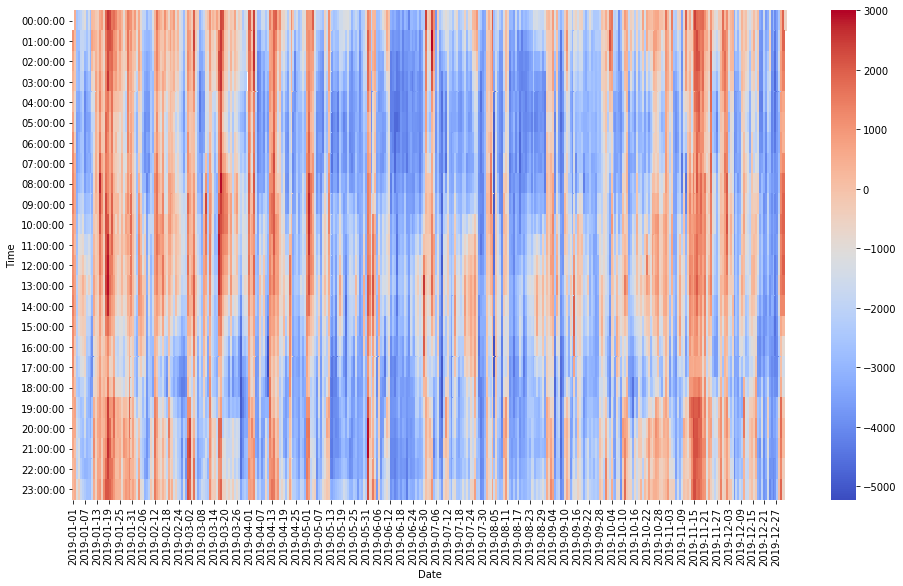

In [13]:
plt.figure(figsize=(16,9))
sns.heatmap(pt_titanic,cmap="coolwarm")

In [14]:
pt_titanic2 = df.pivot_table(index='Time', columns='Month', values='BZN|DE-LU > BZN|FR [MW]-BZN|FR > BZN|DE-LU [MW]')

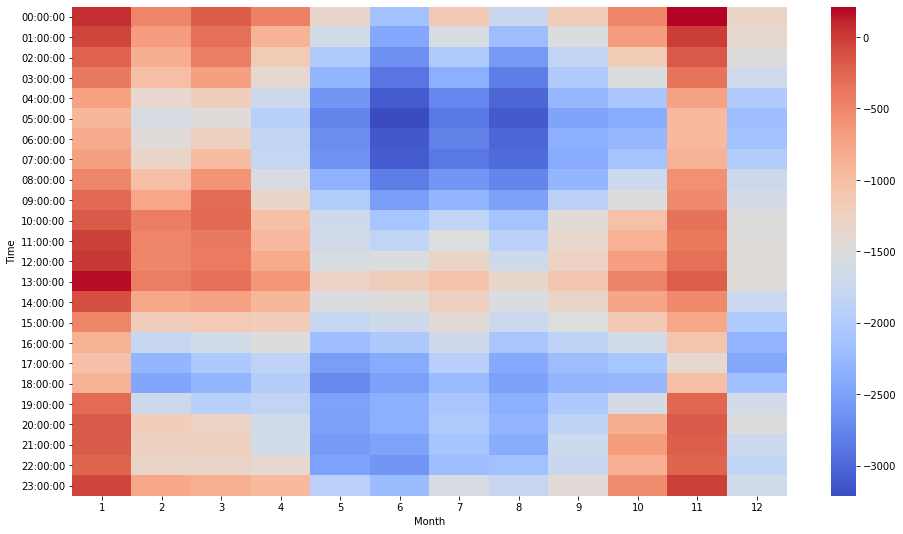

In [15]:
plt.figure(figsize=(16,9))
sns.heatmap(pt_titanic2,cmap="coolwarm")

In [16]:
pt_titanic4 = df.pivot_table(index='Time', columns='day', values='BZN|DE-LU > BZN|FR [MW]-BZN|FR > BZN|DE-LU [MW]')

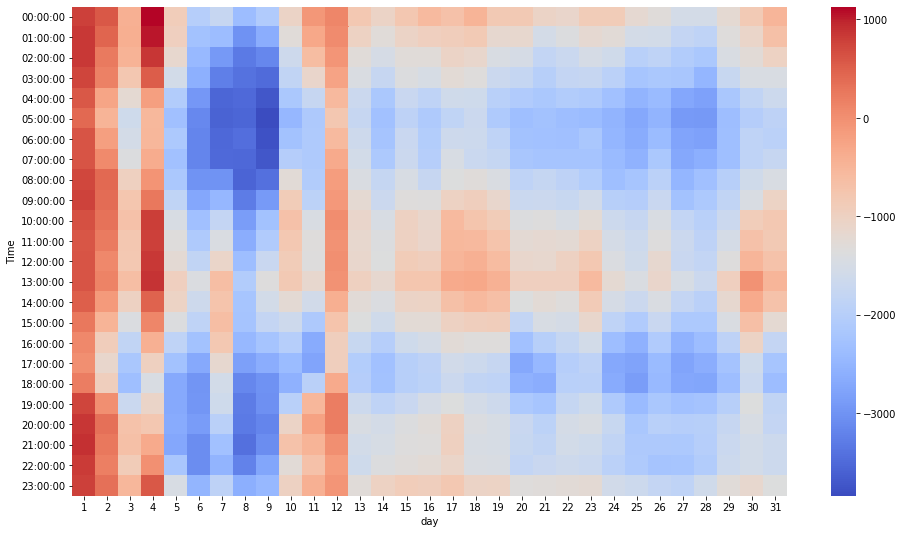

In [17]:
plt.figure(figsize=(16,9))
sns.heatmap(pt_titanic4,cmap="coolwarm")

In [18]:
pt_titanic6 = df.pivot_table(index='Month', columns='day', values='BZN|DE-LU > BZN|FR [MW]-BZN|FR > BZN|DE-LU [MW]')

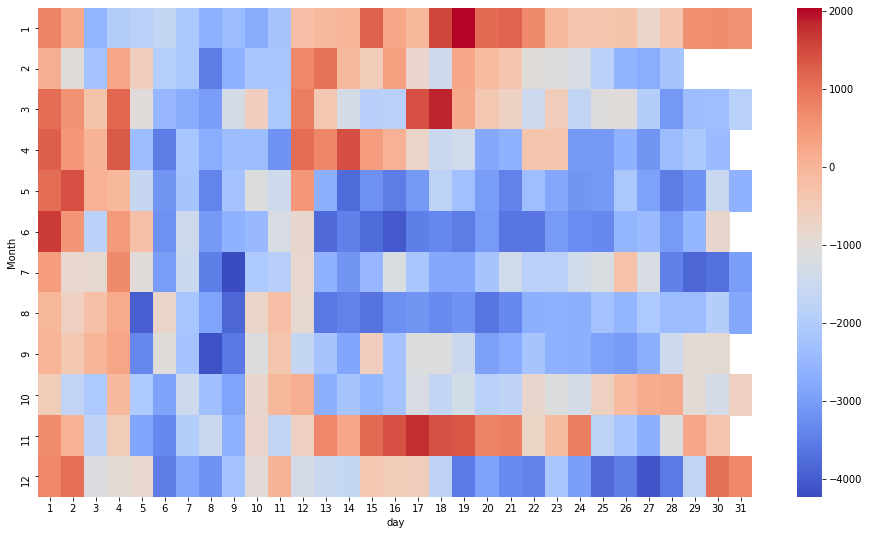

In [19]:
plt.figure(figsize=(16,9))
sns.heatmap(pt_titanic6,cmap="coolwarm")